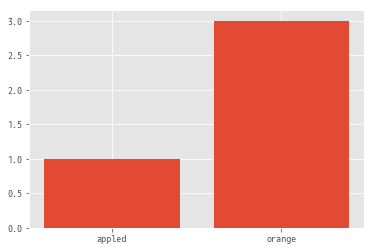

In [1]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

x = [1, 2]
y = [1, 3]

# ラベルの設定
labels = ['appled', 'orange']
ax.bar(x, y, tick_label=labels)

plt.show()
